In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from wordcloud import WordCloud

In [2]:
df = pd.read_csv("spam.csv",encoding='ISO-8859-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
df = df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [4]:
df.columns = ['labels','data']

In [5]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<AxesSubplot:>

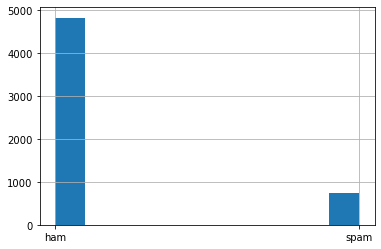

In [6]:
df['labels'].hist()

In [7]:
df['b_labels'] = df['labels'].map({"ham":0,"spam":1})
Y = df['b_labels'].to_numpy()

In [8]:
df_train,df_test,Ytrain,Ytest = train_test_split(df['data'],Y,test_size=0.33)

In [9]:
featurizer = CountVectorizer(decode_error='ignore')
Xtrain = featurizer.fit_transform(df_train)
Xtest = featurizer.transform(df_test)

In [10]:
model = MultinomialNB()
model.fit(Xtrain,Ytrain)
print("train acc:",model.score(Xtrain,Ytrain))
print("test acc:",model.score(Xtest,Ytest))

train acc: 0.995178140905438
test acc: 0.9831430125067971


In [11]:
Ptrain = model.predict(Xtrain)
Ptest = model.predict(Xtest)
print("Train F1:",f1_score(Ytrain,Ptrain))
print("Test F1",f1_score(Ytest,Ptest))

Train F1: 0.9809322033898304
Test F1 0.9407265774378586


In [12]:
Prob_train = model.predict_proba(Xtrain)[:,1]
Prob_test = model.predict_proba(Xtest)[:,1]
print("train AUC:",roc_auc_score(Ytrain,Prob_train))
print("test AUC:",roc_auc_score(Ytest,Prob_test))

train AUC: 0.9949604017695883
test AUC: 0.9755519065863895


In [13]:
cm = confusion_matrix(Ytrain,Ptrain)
cm

array([[3252,    7],
       [  11,  463]], dtype=int64)

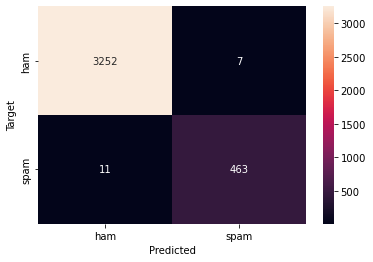

In [14]:
def plot_cm(cm):
    classes = ['ham','spam']
    df_cm = pd.DataFrame(cm,index = classes, columns = classes)
    ax = sns.heatmap(df_cm,annot = True, fmt='g')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Target")
plot_cm(cm)

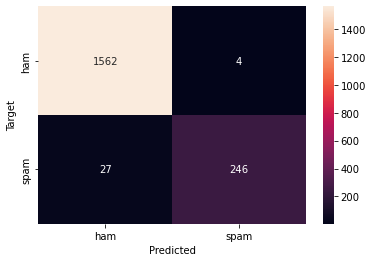

In [15]:
cm_test = confusion_matrix(Ytest,Ptest)
plot_cm(cm_test)

In [16]:
def visualize(label):
    words = ''
    for msg in df[df['labels'] == label]['data']:
        msg = msg.lower()
        words += msg+' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

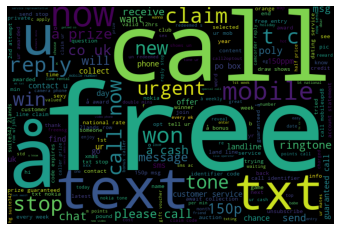

In [17]:
visualize('spam')

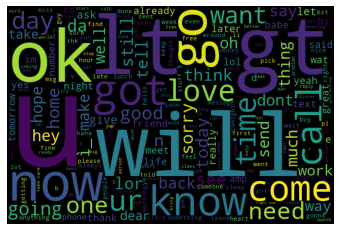

In [18]:
visualize('ham')

In [19]:
X = featurizer.transform(df['data'])
df['predictions'] = model.predict(X)

In [21]:
sneaky_spam = df[(df['predictions'] == 0) & (df['b_labels'] == 1)]['data']
for msg in sneaky_spam:
    print(msg)

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv
Did you hear about the new \Divorce Barbie\"? It comes with all of Ken's stuff!"
Do you realize that in about 40 years, we'll have thousands of old ladies running around with tattoos?
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you could meet.
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
How about getting in touch with folks waiting for company? Just txt back your NAME and AGE to opt in! Enjoy the community (150p/SMS)
Please CALL 08712402779 immediately as there is an urgent message waiting for you
For sale - arsenal dartboard. Good conditi

In [22]:
not_actually_spam = df[(df['predictions'] == 1) & (df['b_labels'] == 0)]['data']
for msg in not_actually_spam:
    print(msg)

Waiting for your call.
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
Hey...Great deal...Farm tour 9am to 5pm $95/pax, $50 deposit by 16 May
Unlimited texts. Limited minutes.
Mathews or tait or edwards or anderson
Gettin rdy to ship comp
Have you laid your airtel line to rest?
I liked the new mobile
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
Nokia phone is lovly..
We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us
